<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="150" alt="MT Learners"  />
    </a>
</p>

### Normalization
Normalization is technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the range of values or losing information

### REQUIRED LIBRAIRES

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATA

In [28]:
#We will use only three columns of our data set and label them
df=pd.read_csv('D:/csv files/wine_data.csv',header=None,usecols=[0,1,2,3]) 
df.columns=['Class label','Alcohol','Malic acid','Citric acid']


,Class label,Alcohol,Malic acid,Citric acid
0,1,14.23,1.71,2.43
1,1,13.20,1.78,2.14
2,1,13.16,2.36,2.67
3,1,14.37,1.95,2.50
4,1,13.24,2.59,2.87


In [29]:
df.head()

,Class label,Alcohol,Malic acid,Citric acid
0,1,14.23,1.71,2.43
1,1,13.20,1.78,2.14
2,1,13.16,2.36,2.67
3,1,14.37,1.95,2.50
4,1,13.24,2.59,2.87


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

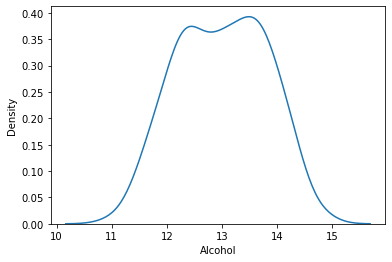

In [30]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

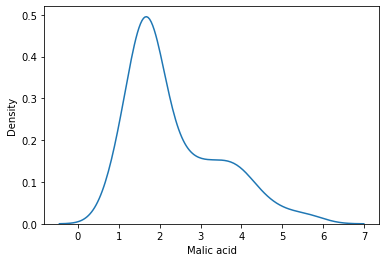

In [31]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot:xlabel='Citric acid', ylabel='Density'>

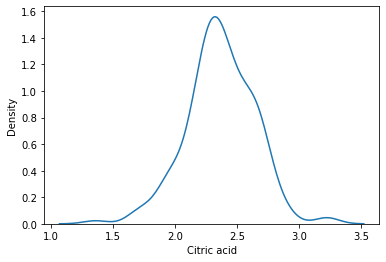

In [35]:
sns.kdeplot(df['Citric acid'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

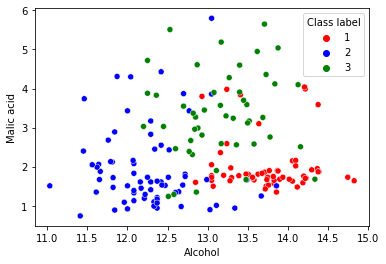

In [42]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

### splitting the data for training and testing

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    df.drop('Class label',axis='columns'),df['Class label'],test_size=0.3,random_state=0)

In [44]:
x_train.shape,x_test.shape

((124, 3), (54, 3))

MinMax_Scalling
Also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_trained_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [47]:
x_trained_scaler=pd.DataFrame(x_trained_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)


,Alcohol,Malic acid,Citric acid
0,0.672515,0.221344,0.431373
1,0.236842,0.108696,0.156863
2,0.543860,0.699605,0.366013
3,0.511696,0.559289,0.294118
4,0.716374,0.152174,0.633987


In [48]:
x_trained_scaler.head()

,Alcohol,Malic acid,Citric acid
0,0.672515,0.221344,0.431373
1,0.236842,0.108696,0.156863
2,0.543860,0.699605,0.366013
3,0.511696,0.559289,0.294118
4,0.716374,0.152174,0.633987


In [49]:
x_train.head()

,Alcohol,Malic acid,Citric acid
22,13.71,1.86,2.36
108,12.22,1.29,1.94
175,13.27,4.28,2.26
145,13.16,3.57,2.15
71,13.86,1.51,2.67


In [50]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid,Citric acid
count,124.0,124.0,124.0
mean,13.0,2.4,2.4
std,0.8,1.1,0.3
min,11.0,0.9,1.4
25%,12.4,1.6,2.2
50%,13.0,1.9,2.4
75%,13.6,3.2,2.6
max,14.8,5.6,3.2


In [51]:
np.round(x_trained_scaler.describe(),1)

,Alcohol,Malic acid,Citric acid
count,124.0,124.0,124.0
mean,0.5,0.3,0.4
std,0.2,0.2,0.2
min,-0.1,0.0,-0.2
25%,0.3,0.2,0.3
50%,0.5,0.2,0.4
75%,0.7,0.5,0.6
max,1.0,1.0,1.0


### Scaling Effects

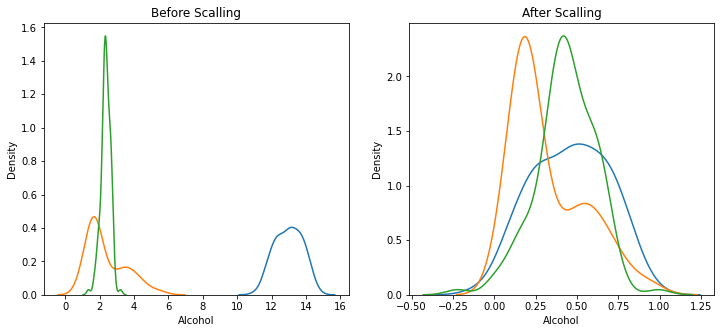

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
sns.kdeplot(x_train['Citric acid'],ax=ax1)

#After scalling
ax2.set_title('After Scalling')
sns.kdeplot(x_trained_scaler['Alcohol'],ax=ax2)
sns.kdeplot(x_trained_scaler['Malic acid'],ax=ax2)
sns.kdeplot(x_trained_scaler['Citric acid'],ax=ax2)
plt.show()

### Individual Effects

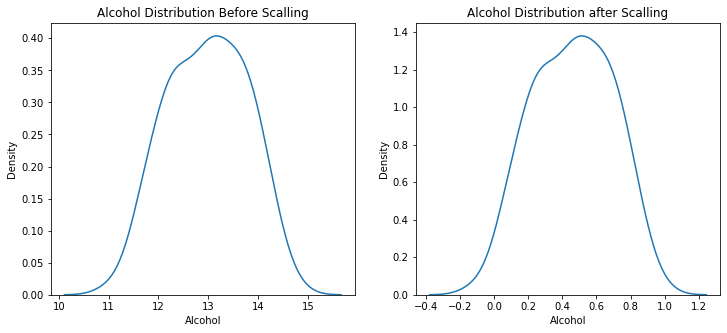

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Alcohol Distribution Before Scalling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)


#After scalling
ax2.set_title('Alcohol Distribution after Scalling')
sns.kdeplot(x_trained_scaler['Alcohol'],ax=ax2)

plt.show()

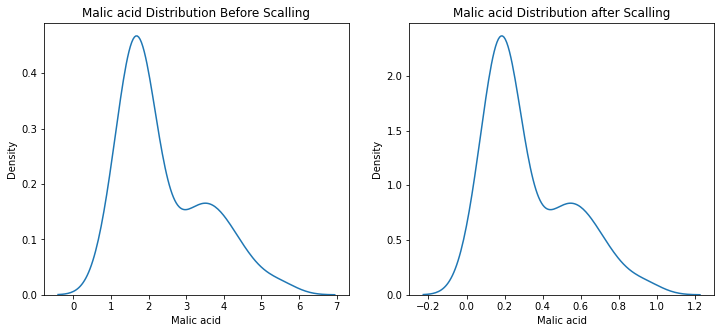

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Malic acid Distribution Before Scalling')
sns.kdeplot(x_train['Malic acid'],ax=ax1)


#After scalling
ax2.set_title('Malic acid Distribution after Scalling')
sns.kdeplot(x_trained_scaler['Malic acid'],ax=ax2)

plt.show()

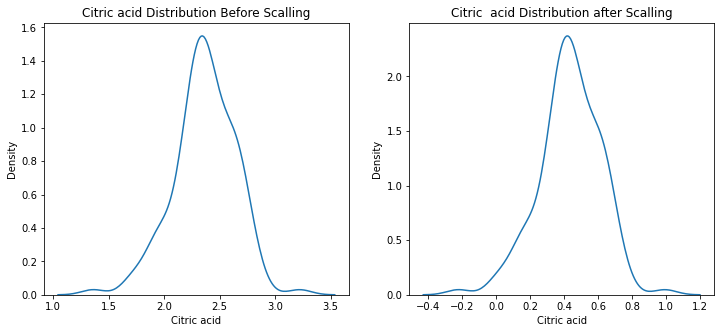

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Citric acid Distribution Before Scalling')
sns.kdeplot(x_train['Citric acid'],ax=ax1)


#After scalling
ax2.set_title('Citric  acid Distribution after Scalling')
sns.kdeplot(x_trained_scaler['Citric acid'],ax=ax2)

plt.show()

## Applying Support vector classifier

In [62]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
model_scaled = SVC(kernel='rbf')
model_scaled.fit(x_trained_scaler,y_train)

SVC()

In [63]:
y_pred=model.predict(x_test)
y_pred_scaled=model_scaled.predict(x_test_scaler)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print('Actual : ',accuracy_score(y_test,y_pred))
print('Scalled : ',accuracy_score(y_test,y_pred_scaled))

Actual :  0.7962962962962963
Scalled :  0.8333333333333334


### Thank you
### Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">Muhammad Bilal</a>

<div data-mime-type="text/markdown" class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput">
<hr>

<h2></h2><h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/">Mt Learners</a> 2022. All rights reserved. </h3><h3></h3>

</div>